In [1]:
import numpy as np
import quail
from quail import Fingerprint, OptimalPresenter
import seaborn as sns

In [2]:
# generate some fake data
next_presented = ['CAT', 'DOG', 'HORSE', 'SNAIL', 'SHOE', 'FOOT', 'ARM', 'UTAH', 'NEW YORK', 'TRUCK', 'EAR', 'ARIZONA', 'BIKE', 'CAB', 'CAR', 'TOE']
# perm = np.random.permutation(len(next_presented))
# next_recalled = [next_presented[i] for i in perm]
next_recalled = next_presented

next_features = [{
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'C',
                    'length' : 3
                 },
                 {
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'D',
                    'length' : 3
                 },
                 {
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'H',
                    'length' : 5
                 },
                 {
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'S',
                    'length' : 5
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'S',
                    'length' : 4
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'F',
                    'length' : 4
                 },
                 {
                    'category' : 'body part',
                    'size' : 'bigger',
                    'starting letter' : 'A',
                    'length' : 3
                 },
                 {
                    'category' : 'state',
                    'size' : 'bigger',
                    'starting letter' : 'U',
                    'length' : 4
                 },
                 {
                    'category' : 'state',
                    'size' : 'bigger',
                    'starting letter' : 'N',
                    'length' : 7
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'T',
                    'length' : 5
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'E',
                    'length' : 3
                 },
                 {
                    'category' : 'state',
                    'size' : 'bigger',
                    'starting letter' : 'A',
                    'length' : 7
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'B',
                    'length' : 4
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'C',
                    'length' : 3
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'C',
                    'length' : 3
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'T',
                    'length' : 3
                 }
]
dist_funcs = {
                'category' : lambda a, b: int(a!=b),
                'size' : lambda a, b: int(a!=b),
                'starting letter' : lambda a, b: int(a!=b),
                'length' : lambda a, b: np.linalg.norm(np.subtract(a,b))
}

egg = quail.Egg(pres=[next_presented], rec=[next_recalled], features=[next_features])

In [3]:
# initialize fingerprint
fingerprint = Fingerprint(init=egg)

# initialize presenter
params = {
    'fingerprint' : fingerprint
}
presenter = OptimalPresenter(params=params, strategy='stabilize')

# update the fingerprint
fingerprint.update(egg)

weights = quail.analyze(egg, analysis='fingerprint')

In [14]:
nperms=10
dist_stick = []
dist_beststick = []
dist_perm = []
dist_rand = []
    
for iperm in range(nperms):
    
    # random
    shuffled_egg = presenter.order(egg, strategy='random')
    weights_rand = quail.analyze(shuffled_egg, analysis='fingerprint')
    dist_rand.append(((weights_rand - weights)**2).values.sum())
    
    # reorder next list using stick breaking
    resorted_egg = presenter.order(shuffled_egg, method='stick')
    weights_stick = quail.analyze(resorted_egg, analysis='fingerprint')
    dist_stick.append(((weights_stick - weights)**2).values.sum())

    # reorder next list using stick breaking
    resorted_egg = presenter.order(shuffled_egg, method='best_stick', nperms=1000)
    weights_stick = quail.analyze(resorted_egg, analysis='fingerprint')
    dist_beststick.append(((weights_stick - weights)**2).values.sum())
    
    # reorder next list using permutation
#     resorted_egg = presenter.order(shuffled_egg, method='permute', nperms=10000)
#     weights_perm = quail.analyze(resorted_egg, analysis='fingerprint')
#     dist_perm.append(((weights_perm - weights)**2).values.sum())
    
    if iperm % 10 == 0:
        print(iperm)

0


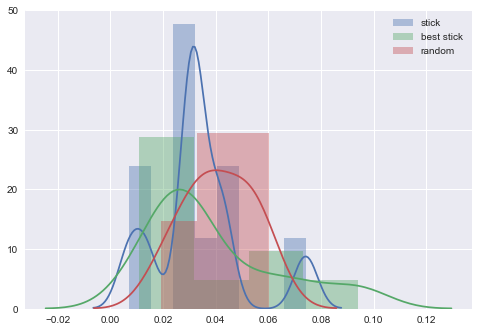

In [15]:
sns.distplot(dist_stick, label='stick')
sns.distplot(dist_beststick, label='best stick')
# sns.distplot(dist_perm, label='permute')
sns.distplot(dist_rand, label='random')
sns.plt.legend()
sns.plt.show()

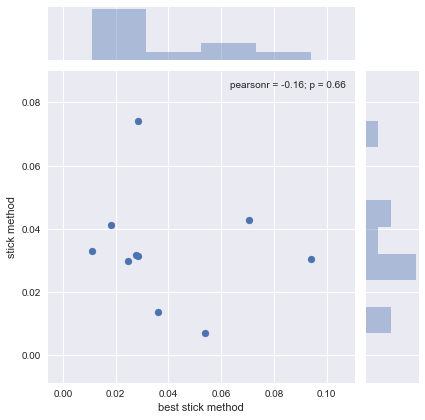

4

In [16]:
import pandas as pd
df = pd.DataFrame(np.array([dist_beststick, dist_stick]).T, columns=['best stick method', 'stick method'])
sns.jointplot(df['best stick method'], df['stick method'])
sns.plt.show()
np.sum(df['best stick method'] > df['stick method'])

In [58]:
presenter.get_params('fingerprint').state = np.array([.5, .5, .5, .95])
pd.concat([quail.analyze(presenter.order(egg, method='stick'), analysis='fingerprint') for i in range(10)])

category    length  starting letter      size
Subject List                                               
0       0     0.462007  0.489471         0.547535  0.657237
        0     0.536453  0.501520         0.513433  0.657032
        0     0.476299  0.474986         0.478896  0.599711
        0     0.540750  0.474375         0.484599  0.665135
        0     0.579164  0.391135         0.512738  0.719010
        0     0.610967  0.524076         0.483529  0.719010
        0     0.528809  0.599331         0.508082  0.658247
        0     0.462588  0.524707         0.485497  0.598786
        0     0.607918  0.618952         0.515542  0.659566
        0     0.523912  0.466983         0.481004  0.659566